# [Link](https://www.tensorflow.org/get_started/mnist/beginners)
# [Github](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/mnist_softmax.py)

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt


% matplotlib inline
plt.style.use('ggplot')

## Import MNIST Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


* 55k data points in mnist.train
* 10k data points in mnist.test
* 5k data points in mnist.validation

In [3]:
print(mnist.train.images.shape)

(55000, 784)


## Plot an Example

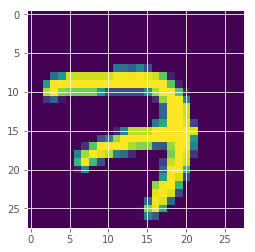

In [4]:
plt.imshow(mnist.train.images[0].reshape(28,28))

In [64]:
x, y = mnist.train.next_batch(100)
#plt.imshow(x[0].reshape(28,28))
#print(y[0])

## Create the Simple Model

In [6]:
input_nodes = 28*28
output_nodes = 10
learning_rate = 0.01


# Creating the graph
tf.reset_default_graph()

x = tf.placeholder(dtype=tf.float32, shape=[None, input_nodes])
y = tf.placeholder(dtype=tf.float32, shape=[None, output_nodes])

W = tf.get_variable(dtype=tf.float32,
                initializer=tf.random_normal_initializer(mean = 0, stddev=0.1),
                shape=[input_nodes, output_nodes],
                   name = 'W')

b = tf.get_variable(dtype=tf.float32,
                   initializer=tf.constant_initializer(0.0),
                    shape =[output_nodes],
                    name = 'b'
                   )

h = tf.nn.softmax(tf.matmul(x,W) + b)

# Cross Entropy 

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(h), reduction_indices=[1]))
optimiser = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)


## Main Session

In [32]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train
batch_size = 100
epoch = 11
epoch_size = 100
n_iter = epoch * epoch_size

for iter in range(n_iter+1):
    xs, ys = mnist.train.next_batch(batch_size)
    sess.run(optimiser, feed_dict={x: xs, y: ys})
    
    if iter%epoch_size ==0:
        print("Epoch: {} Cross Entropy: {} " .format(iter/epoch_size,
              cross_entropy.eval(feed_dict={x:xs, y:ys}, session=sess)))



Epoch: 0.0 Cross Entropy: 2.522023916244507 
Epoch: 1.0 Cross Entropy: 1.6412537097930908 
Epoch: 2.0 Cross Entropy: 1.3950774669647217 
Epoch: 3.0 Cross Entropy: 0.8868723511695862 
Epoch: 4.0 Cross Entropy: 1.0166337490081787 
Epoch: 5.0 Cross Entropy: 0.8019842505455017 
Epoch: 6.0 Cross Entropy: 0.7487879991531372 
Epoch: 7.0 Cross Entropy: 0.7566080689430237 
Epoch: 8.0 Cross Entropy: 0.6021692156791687 
Epoch: 9.0 Cross Entropy: 0.7512831091880798 
Epoch: 10.0 Cross Entropy: 0.5770627856254578 
Epoch: 11.0 Cross Entropy: 0.5323857069015503 


# Test 

In [37]:
test_x = mnist.test.images
test_y = mnist.test.labels

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(h,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
h_out = h.eval(session = sess, feed_dict={x:test_x})
print('Model Accuracy on Test Set: {0:.2f}%' .format(100* sess.run(accuracy, feed_dict={x:test_x, y:test_y})))

Model Accuracy on Test Set: 85.24%


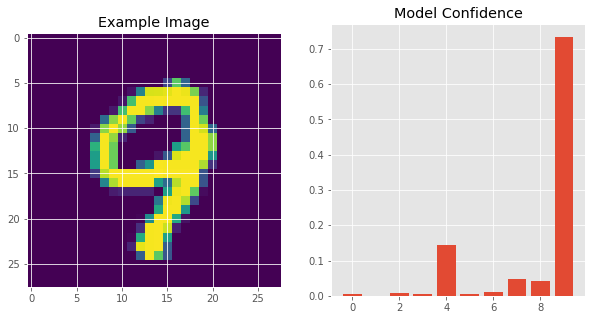

In [63]:
ri = np.random.randint(len(h_out))
index = range(0,10)
f, ax = plt.subplots(1, 2)
f.set_size_inches(10, 5)
ax[0].imshow(test_x[ri].reshape(28,28))
ax[0].set_title('Example Image')
ax[1].bar(index, h_out[ri])
ax[1].set_title('Model Confidence')